In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import torch
torch.cuda.is_available()

/home/shah/miniconda3/envs/rtx_3060/lib/python3.6/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811792945/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [3]:
torch.zeros(1).cuda()

RuntimeError: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW

In [4]:
df1 = pd.read_csv('/home/shah/Desktop/Pebbles Data Modelling/Pebbles Data Science Modelling Project - Interview Stage 2/pebbles_project_data_numeric.csv')
df2 = pd.read_csv('/home/shah/Desktop/Pebbles Data Modelling/Pebbles Data Science Modelling Project - Interview Stage 2/pebbles_project_data.csv') 

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df1.dtypes

In [ ]:
df1.head().T

In [ ]:
df1.columns

In [ ]:
df1.shape

In [5]:
#choosing y variable using iloc and indexing cols of the dataframe
y = df1.iloc[:,[39]]
y.shape

(300001, 1)

In [6]:
#choosing X variables using iloc and indexing cols of the dataframe
X = df1.iloc[:,[1,2,3,11,19,23]]
X.shape

(300001, 6)

In [7]:
X = df1.drop(['Unnamed: 0', 'protect_no_claims',
       'voluntary_excess', 'days_to_inception', 'area_rating', 'theft_rating',
       'zone', 'urbanicity', 'location_parked_overnight', 'age1',
       'age2', 'age_minimum', 'age_maxdifference', 'age_riskiest',
       'lengthlicenceheld', 'licence_type', 'employed',
       'homeowner', 'residency_shortest',
       'vehicle_details_cylinder_capacity', 'vehicle_details_fuel_type',
       'vehicle_details_transmission', 'vehicle_details_body_style',
       'vehicle_value', 'vehicle_age', 'vehicle_purchasemonths',
       'claims_category', 'claims_in_last_five_years', 'convictions',
       'convictions_in_last_five_years', 'points_on_licence',
       'conviction_worst', 'access_to_other_vehicles',
       'number_vehicles_in_household'], axis=1)

In [ ]:
X.shape

In [ ]:
X

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((210000, 6), (90001, 6), (210000, 1), (90001, 1))

In [32]:
#experimenting with LGBM with the learning rate of 0.09 
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression',num_leaves=21,learning_rate=0.09,n_estimators=20, random_state=5)
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='li', early_stopping_rounds=5)



[1]	valid_0's l2: 360721
[2]	valid_0's l2: 298916
[3]	valid_0's l2: 247694
[4]	valid_0's l2: 205229
[5]	valid_0's l2: 170076
[6]	valid_0's l2: 140919
[7]	valid_0's l2: 116782
[8]	valid_0's l2: 96782.5
[9]	valid_0's l2: 80201.9
[10]	valid_0's l2: 66464.9
[11]	valid_0's l2: 55078
[12]	valid_0's l2: 45637.9
[13]	valid_0's l2: 37819.9
[14]	valid_0's l2: 31344.7
[15]	valid_0's l2: 25974.6
[16]	valid_0's l2: 21528.8
[17]	valid_0's l2: 17846
[18]	valid_0's l2: 14792.4
[19]	valid_0's l2: 12263.7
[20]	valid_0's l2: 10165.5


/home/shah/miniconda3/envs/rtx_3060/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(learning_rate=0.09, n_estimators=20, num_leaves=21,
              objective='regression', random_state=5)

In [33]:
#printing accuracy of training and testing - looks very accurate hence overfitting
print('Training accuracy {:.4f}'.format(lgbm.score(X_train, y_train)))
print('Testing accuracy {:.4f}'.format(lgbm.score(X_test, y_test)))

Training accuracy 0.9767
Testing accuracy 0.9766


In [34]:
y_pred = lgbm.predict(X_test)

In [35]:
y_pred.shape

(90001,)

In [36]:
y_pred

array([2015.62318926,  895.09634931,  597.42856716, ...,  588.30522342,
        754.27000628,  295.7552934 ])

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)




10165.47693733783

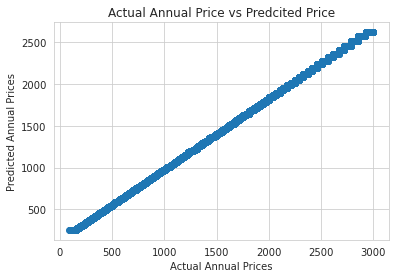

In [38]:
#plotting test vs prediction to visualize the overfitting results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Annual Prices")
plt.ylabel("Predicted Annual Prices")
plt.title("Actual Annual Price vs Predcited Price")
plt.show()